<a href="https://colab.research.google.com/github/evelinafischer/AH2179/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Revealing Representative "Typical" Day-types Using Traffic Data Observation and Clustering**

####**Data Preparation**

In [1]:
# Code from the tutorial

# Import pandas for data handling and analysis
import pandas as pd
# Import numpy for numerical operations
import numpy as np

# Read the CSV file into a pandas DataFrame, using semicolon as the column separator
data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
# Display the contents of the DataFrame
data_df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52
...,...,...,...,...,...,...,...
104838,"E4S 56,780",20211231,23:35:00,23:40:00,283,19.58,115
104839,"E4S 56,780",20211231,23:40:00,23:45:00,284,19.47,87
104840,"E4S 56,780",20211231,23:45:00,23:50:00,285,19.77,130
104841,"E4S 56,780",20211231,23:50:00,23:55:00,286,18.79,129


In [2]:
#Code from the tutorial

# Sort the DataFrame by columns "Date" and "Interval_5"
# This ensures that data is ordered chronologically for each day
data_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())

# Calculate the total number of unique days
ndays = len(days)

# Group the DataFrame by the "Date" column
# This allows easy access to all rows corresponding to a single day
day_subsets_df = data_df.groupby(["Date"])

# Define the total number of 5-minute intervals in a day
nintvals = 288

# Create a matrix 'vectorized_day_dataset' of shape initialized with NaN
# Each row will correspond to a day, each column to a 5-minute interval
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)

# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])
    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])
        # Extract the "Interval_5", column index, and "flow", value, and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting matrix where each row is a day and each column is a 5-minute flow interva
print(vectorized_day_dataset)

/tmp/ipython-input-1114920332.py:28: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(days[i])
/tmp/ipython-input-1114920332.py:32: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(days[i])


[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]


####**Data Exploration**

#####**Missing Values & Outliers**

In [3]:
# Code from the tutorial

# Count and print the total number of NaN values in the vectorized day dataset
print('Number of NaN values: ',np.sum(np.isnan(vectorized_day_dataset)))

# Calculate and print the proportion of NaN values relative to the total number of cells
print('Rate of NaNs: ',np.sum(np.isnan(vectorized_day_dataset))/(ndays*nintvals))

Number of NaN values:  277
Rate of NaNs:  0.0026350837138508373


(288,)


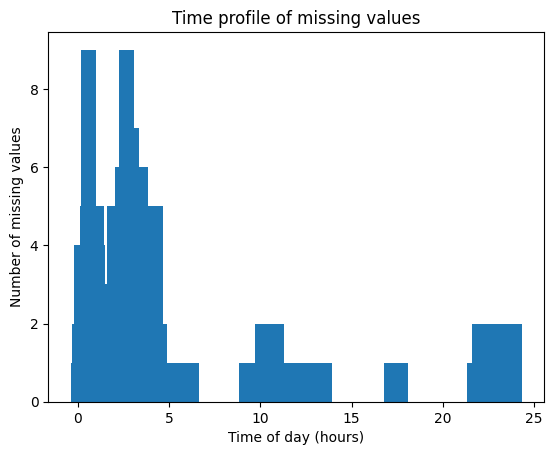

In [4]:
# Code from the tutorial

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Count how many days have missing values, NaN, for each 5-minute interval across all days
nans_per_time = np.sum(np.isnan(vectorized_day_dataset),0)
# Print the shape of the resulting array, should be number of intervals
print(nans_per_time.shape)

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Create an array representing each 5-minute interval
x_axis = np.arange(0, nintvals, 1, dtype=int)

# Initialize an empty list to store interval times in hours
x_axis_hours = []

# Convert interval indices to hours, 5 minutes per interval ÷ 60
for i in range(0, len(x_axis)):
  x_axis_hours.append(float(x_axis[i]*5)/60)


# Plot a bar chart of number of NaNs per interval
ax.bar(x_axis_hours,height=nans_per_time)

# Label the axes and add a title
ax.set_ylabel('Number of missing values')
ax.set_xlabel('Time of day (hours)')
ax.set_title('Time profile of missing values')

plt.show()

In [5]:
# Code from the tutorial

# Count the number of missing values, NaN, for each day across all 5-minute intervals
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)

# Print how many days have at least one missing value
print('Number of days with missing value/values: ',np.size(np.where(nans_per_day > 0),1))

Number of days with missing value/values:  28


#####**Daiy Profile of Flow Dynamic**

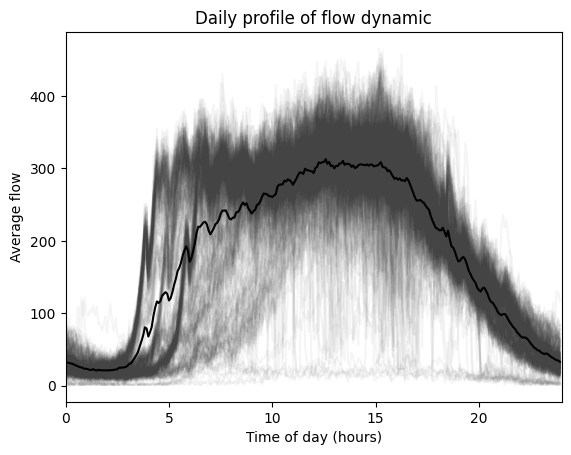

In [6]:
# Code from the tutorial

# Create a new figure and axis object using subplots
fig, ax = plt.subplots()

# Plot all individual days' flow profiles with low opacity for visualization
# Each row of vectorized_day_dataset is a day, columns are 5-minute intervals
# Transpose is used so x-axis matches the time intervals
ax.plot(np.array([x_axis_hours,]*ndays).transpose(),
        vectorized_day_dataset.transpose(),
        color='#444444',alpha=0.05) # Dark gray lines with transparency

# Plot the average flow across all days in black
ax.plot(x_axis_hours,
        np.transpose(np.nanmean(vectorized_day_dataset,0)),
        color='black') # Average line in black

# Label the axes
ax.set_ylabel('Average flow')
ax.set_xlabel('Time of day (hours)')

# Set x-axis limits from 0 to 24 hours
plt.xlim(0,24)


# Add a title for the plot
ax.set_title('Daily profile of flow dynamic')

# Display the plot
plt.show()

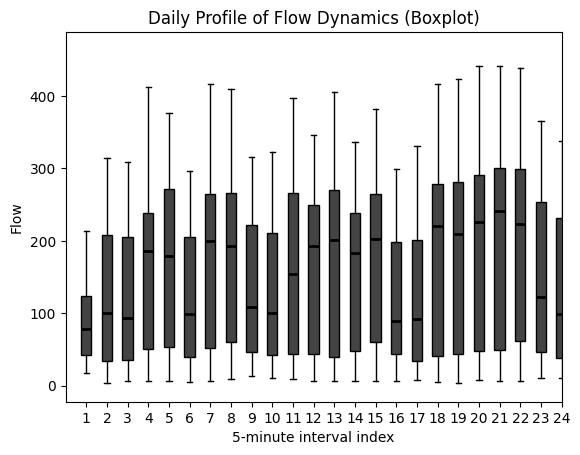

In [7]:
# Code from the tutorial

# Create a new figure and axis object using subplots
fig, ax = plt.subplots()

# Create a boxplot for the dataset
# We transpose the dataset so that each column corresponds to one 5-minute interval
boxplot = ax.boxplot(vectorized_day_dataset.T, patch_artist=True)

# Customize the boxplot appearance
for patch in boxplot['boxes']:
    patch.set_facecolor('#444444') # Set the color of the boxes to gray
for median in boxplot['medians']:
    median.set(color='black', linewidth=2) # Set the median line color to black and thickness

# Label the axes
ax.set_ylabel('Flow')
ax.set_xlabel('5-minute interval index')

# Set the x-axis limits from 0 to 24 hours
plt.xlim(0, 24)

# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics (Boxplot)')

# Display the plot
plt.show()

In [8]:
# Code from the tutorial

# Import the datetime module to work with dates and times
import datetime

# Create an array to store the day of the week for each unique date
day_of_week = np.zeros((ndays))

# Loop through each unique date
for i in range(0, ndays):
    # Convert the current date (stored as integer or string like '20220115') to a datetime object
    day_dt = datetime.datetime.strptime(str(days[i]), '%Y%m%d')
    # Get the day of the week for this date
    # isoweekday(): 1 = Monday, 2 = Tuesday, ..., 7 = Sunday
    day_of_week[i] = day_dt.isoweekday()

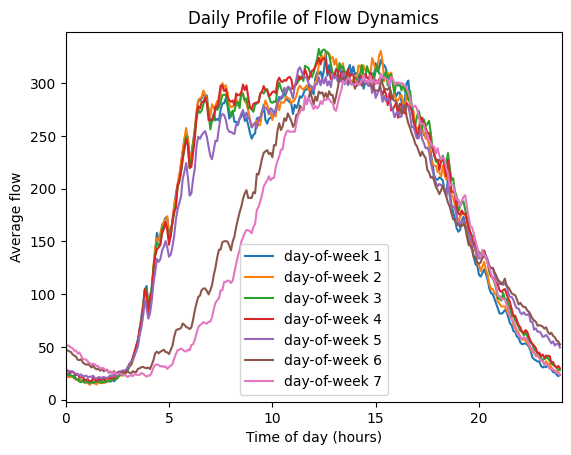

In [9]:
# Code from the tutorial

# Create a new figure and axis object using subplots
fig, ax = plt.subplots()

# Iterate through each day of the week
for i in range(1, 8):
    # Find the indices of days in 'day_of_week' that match the current day i
    day_of_week_index_t = np.where(day_of_week == i)
    # Calculate the number of days that match the current day of the week
    ndays_t = np.size(day_of_week_index_t[0])
    # Plot the average flow for the current day of the week
    # np.nanmean(...) calculates the mean flow across all days of this weekday
    # .transpose() ensures the shape matches for plotting
    ax.plot(
        x_axis_hours,
        np.nanmean(vectorized_day_dataset[day_of_week_index_t[0], :].transpose(), 1),
        label='day-of-week ' + str(i))

# Label the axes
ax.set_ylabel('Average flow')
ax.set_xlabel('Time of day (hours)')

# Set the x-axis limits from 0 to 24 hours
plt.xlim(0, 24)

# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics')

# Add a legend to indicate which line corresponds to which day
ax.legend()

# Display the plot
plt.show()

####**Clustering**

#####**Clustering**

In [10]:
# Code from the tutorial

# Import clustering algorithms from scikit-learn
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN # Three common clustering methods
from sklearn.mixture import GaussianMixture # Probabilistic clustering method, GMM

# clusters = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(vectorized_day_dataset)

In [156]:
# Code from the tutorial

# Define the number of clusters
n_clusters = 15

# Initialize clusters variable to None
clusters = None

# Optional, print indices of days that contain missing values
# print(np.where(nans_per_day > 0)[0])

# Filter out days with missing values, NaNs, from the dataset
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
# Keep only the corresponding dates without NaNs
days_not_nans = days[np.where(nans_per_day == 0)[0]]

# Choose a clustering method, uncomment the one you want to try
# KMeans clustering, with fixed random state and automatic n_init
# clusters = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(vectorized_day_dataset_no_nans)
# Agglomerative clustering, hierarchical clustering with Ward linkage
# clusters = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward').fit(vectorized_day_dataset_no_nans)
# DBSCAN clustering, density-based with custom epsilon and min_samples parameters
# clusters = DBSCAN(eps=1000, min_samples=5).fit(vectorized_day_dataset_no_nans)

# Extract cluster labels, only if a clustering model has been created
if clusters is not None:
  cluster_labels = clusters.labels_

# Gaussian Mixture Model, alternative method, labels must be predicted differently
cluster_labels = GaussianMixture(n_components=n_clusters).fit(vectorized_day_dataset_no_nans).predict(vectorized_day_dataset_no_nans) #check the parameters at  https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_init.html#sphx-glr-auto-examples-mixture-plot-gmm-init-py


# Print the cluster labels for each day
print(cluster_labels)

[ 8  2  2  0  9  2  0  0  2  2  6  0  0  6  0  8  2  0  0 12 12 12  2  2
  0  0  6  0  2  2  0  6  0  0  0  2  2  0  0  0  6  0  2  2  0  0 12 12
  2  2 12 12 12  0 13  2 12 12  0 12  0  2  2 12  0  0  0 12  2  2 12 12
 12 12 12  2  2 12 12  0 12 12 13 12 12 13  2  2  2  0 12 12 12  2  2 12
 12 12 12 12 13  2 12 12 12 12 12 13  2 12 12 12 12 12 13  5 11 11 11 11
  3  5  5 11 11  3  6 10  5  5 11  1  5  9 11 11  3  3  3  5  5 11  3  3
  3  3  6  9 11  3  3  3  3  6  9 11  3  3  1 10  6  9 11  3  3  3  6  8
  9  3 10 11  3 10  6  4 10  3 10  6  9 10 10 10 10 10  6  9 10 10 10 10
 10  6  9 10 10  6  9 10 10 10  4  5  9 10 10 10 10  3  9  9 11 11  3 11
  3  5  9 11 11 11  3  3  5  5 11 11 11 11  3  5  1  5  5 11 11  3 11  1
  5  5 11 11 11 11  9  9 11 11  1  1  1  4  1  1  1  5  5 11 11 11  1  3
  9  9 11 11 11  3  3  5  5  3 11  1  1  5 13  7  7  7  7  9 13  7  7  7
 14 13 13  7  7  7  7 14 13 13  7  7  7  7 14 13 13  7 14  7 14 14 13  2
 14 14 14  0 13 13  7  7  7  7  7 13 13  7  7 14  6

#####**Visualization of Representative Day-Type Patterns**

In [157]:
# Code from the tutorial

# Helps with month calculations
from dateutil.relativedelta import relativedelta
# Used for drawing month borders
from matplotlib.patches import Polygon
# Used for drawing custom lines
from matplotlib.lines import Line2D
# Used for subplot layouts)
from matplotlib import gridspec
# Used for custom legend patches
from matplotlib.patches import Patch
# Used to define color maps for clusters
from matplotlib import colors


def assign_colors(n_clusters, days, assigments):
    """
    Assigns colors and line styles to clusters depending on whether they are mostly weekdays, weekends, or mixed.
    """

    days_colors = [] # Stores color for each day
    color_to_cluster = [] # Stores assigned color per cluster
    style_to_cluster = [] # Stores line style per cluster (solid/dotted)

    # Predefined palettes
    weekend_colors = ['#67001f','#d6604d','#fdae61','#f46d43','#d53e4f','#9e0142','#f768a1','#f1c232']#,'#fe9929','#cc4c02','#e31a1c','#737373','#bdbdbd','#252525','#bcbddc']
    # weekend_school_colors = ['#c2a5cf','#f1b6da','#8e0152','#c51b7d','#de77ae','#ae017e','#fcc5c0','#e31a1c','#737373','#bdbdbd']
    # bank_holidays_colors = ['#543005','#dfc27d','#bf812d','#8c510a']
    mixed_colors = ['#4d4d4d','#35978f','#bababa','#878787']
    weekday_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#cab2d6','#6a3d9a','#b15928','#8dd3c7','#bebada','#fb8072','#b3de69','#bc80bd','#fccde5','#ccebc5','#35978f','#80cdc1']

    # Counters to keep track of weekday/weekend shares per cluster
    cluster_id_weekdays_share = []
    cluster_id_weekend_share = []
    cluster_id_all_days = []

    # Initialize storage for cluster information
    for i in range(0,n_clusters):
        color_to_cluster.append(None) # Placeholder for cluster color
        style_to_cluster.append(None) # Placeholder for cluster line style
        cluster_id_weekdays_share.append(0) # Counter for weekday days in this cluster
        cluster_id_weekend_share.append(0)  # Counter for weekend days in this cluster
        cluster_id_all_days.append(0) # Counter for total days in this cluster

    # Count how many days per cluster are weekdays vs weekends
    for i in range(0,len(days)):
        if assigments[i] is not None:
            cluster_id_all_days[assigments[i]] += 1
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')

            if int(pomT.weekday()) < 5:
                cluster_id_weekdays_share[assigments[i]] += 1
            else:
                cluster_id_weekend_share[assigments[i]] += 1

    # Print the number of weekdays and weekends assigned to each cluster
    print('cluster_id_weekdays_share',cluster_id_weekdays_share)
    print('cluster_id_weekend_share',cluster_id_weekend_share)

    # Assign colors/styles depending on dominant type of day in the cluster
    for i in range(0,len(days)):
        if assigments[i] is not None:
            cluster_idx = assigments[i]
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
            if color_to_cluster[assigments[i]] is None:
                if cluster_id_weekend_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekend_colors.pop()
                        style_to_cluster[assigments[i]] = ':'
                elif cluster_id_weekdays_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekday_colors.pop(0)
                        style_to_cluster[assigments[i]] = '-'
                else:
                    color_to_cluster[assigments[i]] = mixed_colors.pop()
                    style_to_cluster[assigments[i]] = ':'
            days_colors.append(color_to_cluster[assigments[i]])
        else:
            days_colors.append(None)
    return days_colors,color_to_cluster,style_to_cluster


def calmap(ax, year, data, days, assigments, n_clusters,days_colors,color_to_cluster, limit_graphics=False):
    """
    Draws a calendar heatmap showing clusters over a given year.
    """

    # Remove tick marks and style axis
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Draw month borders
    xticks, labels = [], []
    start = datetime.datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)
        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7
        # Create a polygon outlining the month
        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None", linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)

    # Horizontal line to separate weekends
    line = Line2D([0,53],[5,5],linewidth=1, zorder = 20,color="black",linestyle='dashed')
    ax.add_artist(line)

    # Axis labels, unless limit_graphics=True
    if not limit_graphics:
        ax.set_xticks(xticks)
        ax.set_xticklabels(labels)
        ax.set_yticks(0.5 + np.arange(7))
        ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
        ax.set_title("{}".format(year), weight="semibold")
    else:
        plt.tick_params(
            axis='x',          # Changes apply to the x-axis
            which='both',      # Both major and minor ticks are affected
            bottom=False,      # Ticks along the bottom edge are off
            top=False,         # Ticks along the top edge are off
            labelbottom=False)
        plt.tick_params(
            axis='y',          # Changes apply to the x-axis
            which='both',      # Both major and minor ticks are affected
            left=False,        # Ticks along the bottom edge are off
            right=False,       # Ticks along the top edge are off
            labelleft=False)

    # Clear the first and last days of the year in the calendar grid
    valid = datetime.datetime(year, 1, 1).weekday() # Day of week for Jan 1
    data[:valid,0] = np.nan # Set days before Jan 1 to NaN
    valid = datetime.datetime(year, 12, 31).weekday() # Day of week for Dec 31
    data[valid+1:,x1] = np.nan # Set days after Dec 31 to NaN

    # Assign cluster labels to the corresponding days in the calendar grid
    for i in range(0,len(days)):
        if '-' in str(days[i]):
            pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
        else:
            pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
        week_number = int(pomT.strftime("%W"))
        day_of_week = int(pomT.weekday())
        data[day_of_week,week_number] = assigments[i]

    # Loop through every day of the year to handle edge cases in week numbering
    act_date = datetime.datetime(year,1,1)
    while (act_date.year == year):
        week_number = int(act_date.strftime("%W")) # Get the week number of the current day
        day_of_week = int(act_date.weekday()) # Get the week number of the current day
        doy_id = act_date.timetuple().tm_yday # Day of year (1 to 365/366)
        # Adjust week number if day-of-year is very early and week number > 53, edge case
        if doy_id<5 and week_number > 53:
            week_number = 0
        # Move to the next day
        act_date = act_date + datetime.timedelta(days=1)

    #pomT = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
    #week_number = int(pomT.strftime("%V"))
    #day_of_week = int(pomT.weekday())
    #print(week_number,day_of_week)
    #doy_id = pomT.timetuple().tm_yday
    #if doy_id<5 and week_number > 0:
    #    week_number = 0
    #data[day_of_week,week_number] = len(clusters)+10


    # Showing data: define a colormap for plotting, set bad, NaN, values to white
    cmap = plt.cm.spring  # Can be any colormap that you want after the cm
    cmap.set_bad(color='white')

    #ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=0, vmax=len(clusters)+10,
    #          cmap=cmap, origin="lower", alpha=.75)

    # Use the cluster-specific colors for plotting
    cmap = colors.ListedColormap(color_to_cluster)

    # Create boundaries for coloring clusters
    bounds=[-0.1]
    step = 1
    for i in range(0,n_clusters):
        bounds.append(i-0.1+step)
    norm = colors.BoundaryNorm(bounds, cmap.N)

    #print(color_to_cluster)
    #print(bounds)
    #print(norm)

    #print(color_to_cluster)
    #print(bounds)
    #print(cmap)
    #exit(0)

    # Finally, plot the calendar grid with cluster colors using imshow
    ax.imshow(data, extent=[0,53,0,7], zorder=10, interpolation='nearest', origin='lower',cmap=cmap, norm=norm)

def make_calendar_visualization_figure(days,assigments,n_clusters,years,days_colors,color_to_cluster,save_figure: str = None, show_figure:bool = True, limit_graphics = False):
    """
    Generates one or more calendar heatmaps for multiple years.
    """

    # Create a figure sized according to number of years
    fig = plt.figure(figsize=(8,1.5*len(years)), dpi=100)

    # Create a linear array for placeholder data, 53 weeks × 7 days
    X = np.linspace(-1,1, 53*7)

    # Loop through each year to create a subplot for it
    for i, obj in enumerate(years):

        # Generate a unique subplot identifier
        pom_s = str(len(years))+'1'+str(i+1)
        print(pom_s)

        # Create a subplot for the current year
        ax = plt.subplot(int(pom_s), xlim=[0, 53], ylim=[0, 7], frameon=False, aspect=1)

        # Generate placeholder data for calendar grid
        I = 1.2 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
        I = I.reshape(53,7).T
        I.fill(np.nan) # Clear placeholder values

        # Call the calmap function to draw the cluster assignments on the calendar
        calmap(ax, int(obj), I.reshape(53,7).T, days, assigments, n_clusters,days_colors,color_to_cluster, limit_graphics)

    #   ax = plt.subplot(212, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #  I = 1.1 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #   calmap(ax, 2018, I.reshape(53,7).T)

    #ax = plt.subplot(313, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #I = 1.0 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #calmap(ax, 2019, I.reshape(53,7).T)

    # Optional, save the figure to file if save_figure path is provided
    if save_figure:
        plt.savefig(save_figure)

    # Show the figure if show_figure is True or no save path is provided
    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()


def make_figure_centroids(x,y,color_to_cluster,style_to_cluster,cluster_ids,minY = None,maxY = None,save_figure: str = None, show_figure:bool = True):
    """
    Plots cluster centroids (average daily flow profiles) with different colors/styles per cluster.
    """

    # Create a figure
    fig = plt.figure(figsize=(8,3))
    ax = fig.add_subplot(111)

    # Loop through each cluster and plot its centroid
    for i in range(0,len(x)):
        #print(i,color_to_cluster[i],style_to_cluster[i])
        #print(y[i])
        ax.plot(x[i],y[i],style_to_cluster[i], color=color_to_cluster[i], label=str(cluster_ids[i]))

    # Set axis labels
    ax.set_xlabel('Time of day')
    ax.set_ylabel('Flow')

    # Set y-axis limits if provided
    if minY is not None and maxY is not None:
        ax.set_ylim([minY, maxY])

    # Add a legend showing cluster IDs
    plt.legend()

    # Save figure if requested
    if save_figure:
        plt.savefig(save_figure)

    # Display the figure if show_figure is True or no save path is provided
    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()



cluster_id_weekdays_share [30, 13, 2, 32, 1, 3, 9, 24, 3, 1, 25, 40, 42, 1, 10]
cluster_id_weekend_share [0, 0, 30, 0, 2, 22, 8, 0, 3, 18, 0, 0, 0, 18, 0]
111


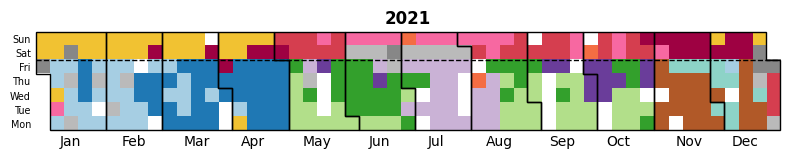

In [158]:
# Code from the tutorial

# Calculate the number of unique clusters in the dataset
n_clusters_t = len(np.unique(cluster_labels))

# Assign colors and line styles to each day based on its cluster
days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters_t, days_not_nans, cluster_labels)

# Generate a calendar-style visualization of cluster assignments
make_calendar_visualization_figure(
    days_not_nans, # Days without missing values
    cluster_labels, # Cluster assignments for each day
    n_clusters_t, # Total number of clusters
    [2021], # Year(s) to display
    days_colors, # Assigned colors for each day
    color_to_cluster, # Color mapping for each cluster
    save_figure=None # Optional, path to save the figure (None = just display)
)

# The calendar visualization shows clusters for each day of the year using color coding

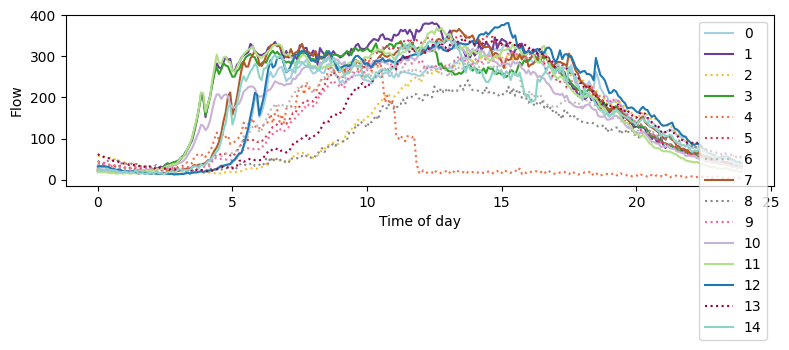

In [159]:
# Code from the tutorial

# Initialize empty lists to store centroid data
centroids_xx = [] # x-axis values for centroids (time of day)
centroids_yy_daytypes = []  # y-axis values for centroids, grouped by day types (average flow for each cluster)
cluster_ids = []  # Cluster IDs

# Iterate through each  to calculate its centroid
for i in range(0, n_clusters_t):
    # Store the x-axis values for centroids (hours of the day)
    centroids_xx.append(x_axis_hours)

    # Calculate the y-axis values for this cluster's centroid
    # np.nanmean computes the average flow across all days in this cluster, ignoring NaN values
    centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())
    centroids_yy_daytypes.append(centroid_yy)

    # Store the cluster ID
    cluster_ids.append(i)

# Generate a figure displaying all cluster centroids
# 'make_figure_centroids' visualizes the centroids of each cluster using the assigned colors and line styles
make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)

####**Independent Work - Clustering Evaluation**

#####**Internal evaluation**

In [160]:
# Code from the tutorial

# Import clustering evaluation metrics from scikit-learn
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

# Calculate the Silhouette Score
# Silhouette Score ranges from -1 to 1; higher values indicate that clusters are well separated and cohesive.
SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels)

# Calculate the Davies-Bouldin Score
# Davies-Bouldin Score evaluates cluster similarity; lower values indicate that clusters are more distinct from each other
DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels)

# Calculate the Calinski-Harabasz Score
# Calinski-Harabasz Score measures the ratio of between-cluster variance to within-cluster variance; higher values indicate better-defined clusters
CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels)

# Print all computed cluster quality scores
print('Silhouette Score:', SC_score)
print('Davies-Bouldin Score:', DB_score)
print('Calinski-Harabasz Score:', CH_score)

Silhouette Score: 0.12140508205387715
Davies-Bouldin Score: 1.9861942600280307
Calinski-Harabasz Score: 60.09921724785596


#####**External evaluation with Short-Term Prediction**

In [161]:
# Code from the tutorial

# Read the evaluation dataset from a CSV file, using ';' as the separator
data_eval_df = pd.read_csv("evaluation_dataset_exercise_5_clustering_highway_traffic.csv", sep=";")

# Sort the evaluation DataFrame by "Date" and "Interval_5" for easier processing
data_eval_df.sort_values(["Date", "Interval_5"])

# Extract all unique dates from the evaluation dataset
days_eval = np.unique(data_eval_df[['Date']].values.ravel())

# Count the total number of unique days
ndays_eval = len(days_eval)

# Group the DataFrame by "Date" for easier per-day access
day_eval_subsets_df = data_eval_df.groupby(["Date"])

# Initialize a 2D array to store flow values for each day and 5-minute interval, filled with NaNs
vectorized_day_dataset_eval = np.zeros((ndays_eval, nintvals))
vectorized_day_dataset_eval.fill(np.nan)

# Loop through each unique day
for i in range(0, ndays_eval):
    # Get the subset of data for the current day
    df_t = day_eval_subsets_df.get_group(days_eval[i])

    # Loop through each row, interval, of the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame, this line is redundant
        df_t = day_eval_subsets_df.get_group(days_eval[i])

        # Fill the vectorized array at the correct interval with the observed flow
        vectorized_day_dataset_eval[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the final 2D array representing flow values for all days and intervals
print(vectorized_day_dataset_eval)

/tmp/ipython-input-3752081116.py:25: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_eval_subsets_df.get_group(days_eval[i])
/tmp/ipython-input-3752081116.py:30: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_eval_subsets_df.get_group(days_eval[i])


[[35. 29. 32. ... 62. 66. 71.]
 [44. 44. 51. ... 30. 31. 23.]
 [21. 22. 17. ... 20. 22. 22.]
 ...
 [17. 17. 20. ... 35. 25. 27.]
 [37. 25. 30. ... 37. 36. 49.]
 [42. 28. 32. ... 45. 49. 38.]]


In [162]:
# Code from the tutorial


# Calculate the total number of missing values, NaNs, in the evaluation dataset
print('Number of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)))

# Calculate the proportion of missing values relative to all cells, days * intervals
print('Rate of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)) / (ndays_eval * nintvals))

# Count the number of NaN values for each day, sum along intervals for each day
nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval), 1)

# Count how many days have at least one missing value
print('Number of days with missing values:', np.size(np.where(nans_per_day_eval > 0)))

# Keep only the days without missing values and create a new dataset
vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval == 0)[0], :]
days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]

# Print the number of days remaining after removing days with missing values
print('Final number of days in evaluation dataset:', len(days_not_nans_eval))

# Print the actual dates of days without missing values
print('List of days without missing values:', days_not_nans_eval)

# Store the total number of days in the filtered evaluation dataset
ndays_eval_not_nans = len(days_not_nans_eval)

Number of NaNs: 96
Rate of NaNs: 0.004166666666666667
Number of days with missing values: 11
Final number of days in evaluation dataset: 69
List of days without missing values: [20220108 20220109 20220131 20220204 20220209 20220210 20220211 20220223
 20220226 20220227 20220302 20220304 20220305 20220306 20220310 20220314
 20220315 20220321 20220323 20220326 20220403 20220406 20220416 20220418
 20220421 20220422 20220425 20220427 20220428 20220503 20220505 20220514
 20220519 20220521 20220522 20220526 20220530 20220601 20220603 20220609
 20220616 20220619 20220623 20220628 20220704 20220711 20220712 20220904
 20220910 20220911 20220920 20220921 20220925 20220927 20220929 20220930
 20221005 20221022 20221024 20221114 20221116 20221121 20221122 20221213
 20221216 20221218 20221220 20221223 20221230]


In [163]:
# Code from the tutorial

# Import the pairwise_distances function from scikit-learn's metrics library
import sklearn.metrics.pairwise as dis_lib


# Function to find the closest centroid to a new day's data over a given interval range
def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
    closest_centroid = None # Placeholder for the index of the closest centroid
    closest_dist = None # Placeholder for the distance to the closest centroid

    # Loop through all centroids to find which one is closest to the new day
    for i in range(0, len(centroids)):
        # Compute Euclidean distance between centroid i and the new day
        ed_t = dis_lib.paired_distances(centroids[i], new_day, metric='euclidean')

        # Update closest centroid if this centroid is closer
        if closest_centroid is None or closest_dist > ed_t:
            closest_centroid = i
            closest_dist = ed_t

    # Return the index of the closest centroid
    return closest_centroid

# Initialize a list to store the centroid data for each cluster
centroids = []

# Compute the centroid for each cluster by averaging all days in that cluster
for i in np.unique(cluster_labels):
    centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).reshape(1, nintvals)
    centroids.append(centroid)

# Number of past intervals to use when classifying/predicting the next interval
n_past_intervals_for_classification = 5

# Initialize variables for tracking prediction errors and counts
total_mae = 0
total_mape = 0
prediction_counts = 0

# Loop through each day in the evaluation dataset, filtered to days without missing values
for i in range(0, ndays_eval_not_nans):
    # Loop through each interval starting from 'n_past_intervals_for_classification' up to the second-to-last interval
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        # Find the closest centroid using the past intervals as input
        centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

        # Predict the next interval's value using the centroid
        predicted_value = centroids[centroid_index][0, j + 1]

        # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
        mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
        mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

        # Accumulate the errors and increment prediction count
        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

# Calculate and print overall prediction accuracy metrics
print('Prediction accuracy MAE:', total_mae / prediction_counts)
print('Prediction accuracy MAPE:', total_mape / prediction_counts)


Prediction accuracy MAE: 22.94900259509895
Prediction accuracy MAPE: 0.23285131232907477


####**Results**

#####**K-Means Clustering**

**5 clusters**

*   Silhouette Score: 0.22969753927464953
*   Davies-Bouldin Score: 1.5158295908096302
*   Calinski-Harabasz Score: 114.69473802964785
*   Prediction accuracy MAE: 27.619317805790065
*   Prediction accuracy MAPE: 0.2773115163252373


**7 clusters**

*   Silhouette Score: 0.24133229796735856
*   Davies-Bouldin Score: 1.4813566163658227
*   Calinski-Harabasz Score: 103.05063003488681
*   Prediction accuracy MAE: 25.32641523281189
*   Prediction accuracy MAPE: 0.25373071230363786

**10 clusters**


*   Silhouette Score: 0.1888295110481911
*   Davies-Bouldin Score: 1.7434244441047695
*   Calinski-Harabasz Score: 81.05449965897482
*   Prediction accuracy MAE: 24.607666013093354
*   Prediction accuracy MAPE: 0.24531753390066866


**15 clusters**


*   Silhouette Score: 0.1605062621378209
*   Davies-Bouldin Score: 1.6504154537744227
*   Calinski-Harabasz Score: 60.69523101853101
*   Prediction accuracy MAE: 22.701452976512627
*   Prediction accuracy MAPE: 0.21680066258360725



#####**Agglomerative Clustering**


**5 clusters**


*   Silhouette Score: 0.26377798541725606
*   Davies-Bouldin Score: 1.2314039157719154
*   Calinski-Harabasz Score: 118.05469625253788
*   Prediction accuracy MAE: 28.65384718437549
*   Prediction accuracy MAPE: 0.29082985204795475


**7 clusters**

*   Silhouette Score: 0.24315720694085063
*   Davies-Bouldin Score: 1.5136059986976247
*   Calinski-Harabasz Score: 100.74968399031134
*   Prediction accuracy MAE: 24.767895406358022
*   Prediction accuracy MAPE: 0.25017379103102816


**10 clusters**


*   Silhouette Score: 0.21506167345844876
*   Davies-Bouldin Score: 1.4150683146774594
*   Calinski-Harabasz Score: 78.95519615286356
*   Prediction accuracy MAE: 24.122646513924682
*   Prediction accuracy MAPE: 0.23292646916785487


**15 clusters**


*   Silhouette Score: 0.15394343188439513
*   Davies-Bouldin Score: 1.6443630824594457
*   Calinski-Harabasz Score: 61.11763538195128
*   Prediction accuracy MAE: 23.42331859697504
*   Prediction accuracy MAPE: 0.22918131935858221


#####**DBSCAN**

**Min sample = 2 & Epsilon = 500**


*   Silhouette Score: -0.02772100330028316
*   Davies-Bouldin Score: 2.3795720914163345
*   Calinski-Harabasz Score: 35.327906331751436
*   Prediction accuracy MAE: 26.23680191809368
*   Prediction accuracy MAPE: 0.35889508773131146


**Min sample = 2 & Epsilon = 750**

*   Silhouette Score: 0.1892453950251532
*   Davies-Bouldin Score: 3.667618266242758
*   Calinski-Harabasz Score: 11.225537488321145
*   Prediction accuracy MAE: 39.93303082566708
*   Prediction accuracy MAPE: 0.4835667633634184

**Min sample = 3 & Epsilon = 500**


*   Silhouette Score: -0.02772100330028316
*   Davies-Bouldin Score: 2.3795720914163345
*   Calinski-Harabasz Score: 35.327906331751436
*   Prediction accuracy MAE: 26.23680191809368
*   Prediction accuracy MAPE: 0.35889508773131146


**Min sample = 3 & Epsilon = 750**


*  Silhouette Score: 0.1892453950251532
*  Davies-Bouldin Score: 3.667618266242758
*  Calinski-Harabasz Score: 11.22553748832114
*  Prediction accuracy MAE: 39.93303082566708
*  Prediction accuracy MAPE: 0.4835667633634184


**Min sample = 3 & Epsilon = 1000**

*  Silhouette Score: 0.34354697960895075
*  Davies-Bouldin Score: 2.436846439780033
*  Calinski-Harabasz Score: 11.023697758834578
*  Prediction accuracy MAE: 40.907256491981066
*  Prediction accuracy MAPE: 0.4698809894117074


**Min sample = 5 & Epsilon = 1000**

*  Silhouette Score: 0.34354697960895075
*  Davies-Bouldin Score: 2.436846439780033
*  Calinski-Harabasz Score: 11.023697758834578
*  Prediction accuracy MAE: 40.907256491981066
*  Prediction accuracy MAPE: 0.4698809894117074




#####**Gaussian Mixture Model**

**5 clusters**

*   Silhouette Score: 0.26562192688559616
*   Davies-Bouldin Score: 1.2800821805683251
*   Calinski-Harabasz Score: 122.17125049278283
*   Prediction accuracy MAE: 28.164618686440367
*   Prediction accuracy MAPE: 0.303512076496475


**7 clusters**

*  Silhouette Score: 0.21186667704588233
*  Davies-Bouldin Score: 1.6091727430869482
*  Calinski-Harabasz Score: 102.1268006546712
*  Prediction accuracy MAE: 25.83695971649247
*  Prediction accuracy MAPE: 0.2757309576857268


**10 clusters**


*   Silhouette Score: 0.18612505577103952
*   Davies-Bouldin Score: 1.7514685337115399
*   Calinski-Harabasz Score: 80.96658023361424
*   Prediction accuracy MAE: 24.642731688611512
*   Prediction accuracy MAPE: 0.2470597571112234


**15 clusters**


*   Silhouette Score: 0.12140508205387715
*   Davies-Bouldin Score: 1.9861942600280307
*   Calinski-Harabasz Score: 60.09921724785596
*   Prediction accuracy MAE: 22.94900259509895
*   Prediction accuracy MAPE: 0.23285131232907477
